# `AnnData` Conversion

The purpose of this notebook is to convert the cell table to a [`AnnData`](https://anndata.readthedocs.io/en/latest/index.html) Object.

`AnnData` stands for Annotated Data, and is a data structure well suited for single cell data. It is a multi-faceted object composed of matrices and DataFrames

In [2]:
from dask.distributed import Client
from anndata import read_zarr
from ark.utils.data_utils import ConvertToAnnData, load_anndatas, AnnDataIterDataPipe
import os

In [3]:
Client(threads_per_worker = 2)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52783,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:52804,Total threads: 2
Dashboard: http://127.0.0.1:52809/status,Memory: 12.80 GiB
Nanny: tcp://127.0.0.1:52786,


In [1]:
base_dir = "../data/example_dataset/"

## 0. Download the Example Dataset

Here we are using the example data located in `/data/example_dataset/input_data`. To modify this notebook to run using your own data, simply change `base_dir` to point to your own sub-directory within the data folder.

* `base_dir`: the path to all of your imaging data. This directory will contain all of the data generated by this notebook, as well as the data previously generated by segmentation and cell clustering.

In [4]:
from ark.utils.example_dataset import get_example_dataset

get_example_dataset(dataset="post_clustering", save_dir= base_dir, overwrite_existing=True)

/Users/srivarra/.pyenv/versions/3.11.5/envs/ark/lib/python3.11/site-packages/datasets/load.py:2089: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=False' instead.
  warnings.warn(
/Users/srivarra/Angelo Lab/Internal/ark-analysis/src/ark/utils/example_dataset.py:127: UserWarning: Files exist in ../data/example_dataset/image_data.                         They will be overwritten by the downloaded example dataset.
  warnings.warn(UserWarning(f"Files exist in {dst_path}. \
/Users/srivarra/Angelo Lab/Internal/ark-analysis/src/ark/utils/example_dataset.py:127: UserWarning: Files exist in ../data/example_dataset/segmentation/cell_table.                         They will be overwritten by the downloaded example dataset.
  warnings.warn(UserWarning(f"Files exist in {dst_path}. \
/Users/srivarra/Angelo Lab/Internal/ark-analysis/src/ark/utils/example_dataset.py:127: UserWarning: Files

## 1. Convert the Cell Table to `AnnData` Objects

- `cell_table_path`: The path to the cell table that you wish to convert to `AnnData` objects. 
- `anndata_save_dir`: The directory where you would like to save the `AnnData` objects. This directory will be created if it does not already exist.

In [12]:
cell_table_path = os.path.join(base_dir, "segmentation/cell_table/cell_table_size_normalized_cell_labels.csv")
anndata_save_dir = os.path.join(base_dir, "anndata")

- `markers`: These are the names of the markers that you wish to extract from the Cell Table. You can specify each marker that you would like to use, or you may set it to `None` in order to grab all markers.
- `extra_obs_parameters`: These are the names of the extra columns in the Cell Table that you wish to extract. You can specify each parameter that you would like to use, or you may set it to `None` in order to grab all parameters.

In [13]:
# markers = ["CD14", "CD163", "CD20", "CD3", "CD31", "CD4", "CD45", "CD68", "CD8", "CK17", "Collagen1", "ECAD",
#               "Fibronectin", "GLUT1", "H3K27me3", "H3K9ac", "HLADR", "IDO", "Ki67", "PD1", "SMA", "Vim"]
markers = None

In [14]:
convert_to_anndata = ConvertToAnnData(cell_table_path, markers=markers, extra_obs_parameters=None)

In [15]:
fov_adata_paths = convert_to_anndata.convert_to_adata(save_dir=anndata_save_dir)

### 1.1 Load a single `AnnData` object

In [9]:
fov0_adata_path = os.path.join(anndata_save_dir, "fov0.zarr")

In [10]:
fov0 = read_zarr(fov0_adata_path)

We can view the marker intensities for each cell in the `AnnData` object with the `.to_df()` method, and get the marker / channel names with `.var_names`.

In [18]:
fov0.var_names

Index(['CD14', 'CD163', 'CD20', 'CD3', 'CD31', 'CD4', 'CD45', 'CD68', 'CD8',
       'CK17', 'Collagen1', 'ECAD', 'Fibronectin', 'GLUT1', 'H3K27me3',
       'H3K9ac', 'HLADR', 'IDO', 'Ki67', 'PD1', 'SMA', 'Vim'],
      dtype='object')

In [11]:
fov0.to_df()

,CD14,CD163,CD20,CD3,CD31,CD4,CD45,CD68,CD8,CK17,...,Fibronectin,GLUT1,H3K27me3,H3K9ac,HLADR,IDO,Ki67,PD1,SMA,Vim
fov0_1,0.000399,0.000024,0.012383,0.008292,0.000000,0.011049,0.014530,0.000178,0.000785,0.000035,...,0.000134,0.001747,0.015475,0.004704,0.000515,0.000243,0.000431,1.109487e-03,0.000000,0.001993
fov0_2,0.006646,0.001680,0.000406,0.006538,0.000061,0.012894,0.019244,0.000368,0.000103,0.000185,...,0.000071,0.001154,0.024963,0.018478,0.003646,0.000375,0.000343,2.026971e-04,0.000000,0.000902
fov0_3,0.000778,0.000671,0.000396,0.000981,0.000060,0.009768,0.003471,0.000000,0.000120,0.000058,...,0.000526,0.002033,0.012223,0.005136,0.005709,0.000133,0.000978,6.849804e-07,0.000629,0.002259
fov0_4,0.000282,0.000759,0.000329,0.000204,0.000005,0.003297,0.002791,0.001523,0.000142,0.000355,...,0.000500,0.002328,0.019580,0.032538,0.000620,0.000349,0.000365,2.710830e-05,0.000675,0.000798
fov0_5,0.001022,0.001147,0.001744,0.005891,0.000109,0.014137,0.017929,0.000373,0.000127,0.000436,...,0.001839,0.002183,0.024172,0.007252,0.003693,0.000280,0.001031,1.694448e-04,0.004064,0.003666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fov0_665,0.000488,0.000503,0.000764,0.005539,0.000215,0.007558,0.017787,0.000210,0.002353,0.000462,...,0.002810,0.002388,0.032813,0.011014,0.000133,0.000038,0.000494,1.182592e-04,0.000063,0.002759
fov0_666,0.000103,0.000528,0.000553,0.008570,0.000162,0.011928,0.021502,0.000238,0.005243,0.000796,...,0.000593,0.002244,0.024003,0.009101,0.000398,0.000073,0.001192,5.894804e-04,0.000110,0.002197
fov0_667,0.000727,0.001029,0.017522,0.002606,0.000083,0.005498,0.009430,0.000231,0.002023,0.000534,...,0.000392,0.001926,0.082291,0.026390,0.001129,0.000298,0.000578,1.865444e-04,0.000179,0.008316
fov0_668,0.000245,0.000769,0.000195,0.004832,0.000283,0.009733,0.008750,0.000000,0.000279,0.000558,...,0.000668,0.003314,0.025114,0.016361,0.000142,0.000139,0.000081,2.467261e-04,0.044327,0.008450


We can view the observations (in this case cell segmentations), with the `obs` property. The observations for each cell include measurements such as `area`, `perimeter`, and categorical information like `cell_meta_cluster`.


In [16]:
fov0.obs

,label,area,eccentricity,major_axis_length,minor_axis_length,perimeter,convex_area,equivalent_diameter,major_minor_axis_ratio,perim_square_over_area,major_axis_equiv_diam_ratio,convex_hull_resid,centroid_dif,num_concavities,fov,cell_meta_cluster
fov0_1,1,34.0,0.699679,8.007260,5.720845,20.485281,36.0,6.579525,1.399664,12.342552,1.216997,0.055556,0.022207,0.0,fov0,CD4T
fov0_2,2,43.0,0.777362,9.629459,6.057447,23.899495,45.0,7.399277,1.589689,13.283392,1.301405,0.044444,0.018660,0.0,fov0,CD4T
fov0_3,3,51.0,0.768859,10.126542,6.475092,25.071068,52.0,8.058239,1.563922,12.324675,1.256669,0.019231,0.012862,0.0,fov0,CD4T
fov0_4,4,108.0,0.796695,15.501110,9.368588,40.384776,115.0,11.726460,1.654583,15.101205,1.321892,0.060870,0.021054,0.0,fov0,CD4T
fov0_5,5,134.0,0.870926,18.883940,9.279841,45.556349,138.0,13.061933,2.034942,15.487918,1.445723,0.028986,0.016876,0.0,fov0,CD4T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fov0_665,665,141.0,0.822785,17.971267,10.214027,46.763456,151.0,13.398760,1.759469,15.509367,1.341263,0.066225,0.013487,0.0,fov0,CD4T
fov0_666,666,84.0,0.737387,12.794899,8.642579,33.899495,89.0,10.341766,1.480449,13.680664,1.237206,0.056180,0.008697,0.0,fov0,CD4T
fov0_667,667,161.0,0.875925,21.060249,10.160460,52.556349,175.0,14.317527,2.072765,17.156334,1.470942,0.080000,0.018782,0.0,fov0,Bcell
fov0_668,668,34.0,0.641350,7.787536,5.974973,20.863961,37.0,6.579525,1.303359,12.803084,1.183602,0.081081,0.030461,0.0,fov0,CD4T


We can view the $x$ and $y$ centroids of each cell in our cohort by accessing the `obsm` attribute of the `AnnData` object.

In [17]:
fov0.obsm["spatial"]

,centroid_x,centroid_y
fov0_1,1.794118,4.411765
fov0_2,1.953488,69.953488
fov0_3,2.333333,94.235294
fov0_4,3.407407,238.185185
fov0_5,3.656716,263.201493
...,...,...
fov0_665,506.865248,269.709220
fov0_666,507.880952,222.880952
fov0_667,507.217391,345.689441
fov0_668,509.088235,165.000000


## 1.2 Load all `AnnData` objects

We can load all the `AnnData` objects and store then into an [`AnnCollection`](https://anndata.readthedocs.io/en/latest/generated/anndata.experimental.AnnCollection.html), which acts as one large `AnnData` object.

In [19]:
fovs_ac = load_anndatas(anndata_dir=anndata_save_dir, join_obs="inner", join_obsm="inner")

## 2. Basic Use Cases

We can utilize `AnnData` objects or `AnnCollections` in a similar way to a Pandas DataFrame. For example, we can filter the `AnnCollection` to only include cells that have a `cell_meta_cluster` label of `"CD4T"`.

In [20]:
fovs_ac_cd4t = fovs_ac[fovs_ac.obs["cell_meta_cluster"] == "CD4T"]
fovs_ac_cd4t.obs.df

,label,area,eccentricity,major_axis_length,minor_axis_length,perimeter,convex_area,equivalent_diameter,major_minor_axis_ratio,perim_square_over_area,major_axis_equiv_diam_ratio,convex_hull_resid,centroid_dif,num_concavities,fov,cell_meta_cluster
fov0_1,1,34.0,0.699679,8.007260,5.720845,20.485281,36.0,6.579525,1.399664,12.342552,1.216997,0.055556,0.022207,0.0,fov0,CD4T
fov0_2,2,43.0,0.777362,9.629459,6.057447,23.899495,45.0,7.399277,1.589689,13.283392,1.301405,0.044444,0.018660,0.0,fov0,CD4T
fov0_3,3,51.0,0.768859,10.126542,6.475092,25.071068,52.0,8.058239,1.563922,12.324675,1.256669,0.019231,0.012862,0.0,fov0,CD4T
fov0_4,4,108.0,0.796695,15.501110,9.368588,40.384776,115.0,11.726460,1.654583,15.101205,1.321892,0.060870,0.021054,0.0,fov0,CD4T
fov0_5,5,134.0,0.870926,18.883940,9.279841,45.556349,138.0,13.061933,2.034942,15.487918,1.445723,0.028986,0.016876,0.0,fov0,CD4T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fov10_2785,2785,142.0,0.820592,18.748166,10.714859,49.006097,149.0,13.446190,1.749735,16.912659,1.394311,0.046980,0.018177,0.0,fov10,CD4T
fov10_2786,2786,82.0,0.808748,13.969363,8.216162,36.313708,88.0,10.217908,1.700230,16.081530,1.367145,0.068182,0.009740,0.0,fov10,CD4T
fov10_2787,2787,91.0,0.902932,16.917289,7.270758,38.727922,93.0,10.764051,2.326757,16.481890,1.571647,0.021505,0.008236,0.0,fov10,CD4T
fov10_2788,2788,170.0,0.899438,23.352031,10.205950,56.970563,181.0,14.712264,2.288080,19.092030,1.587249,0.060773,0.012740,0.0,fov10,CD4T


As another example, we can select just one FOV from the `AnnCollection` by filtering on the `fov` column of the `obs` DataFrame.

In [22]:
fov1_adata = fovs_ac[fovs_ac.obs["fov"] == "fov1"]

fov1_adata.obs.df

,label,area,eccentricity,major_axis_length,minor_axis_length,perimeter,convex_area,equivalent_diameter,major_minor_axis_ratio,perim_square_over_area,major_axis_equiv_diam_ratio,convex_hull_resid,centroid_dif,num_concavities,fov,cell_meta_cluster
fov1_1,1,135.0,0.863716,19.316234,9.734970,48.384776,140.0,13.110581,1.984211,17.341382,1.473332,0.035714,0.015802,0.0,fov1,other
fov1_2,2,257.0,0.833671,24.997660,13.805228,64.384776,266.0,18.089294,1.810739,16.129959,1.381904,0.033835,0.006779,0.0,fov1,CD14_monocyte
fov1_3,3,21.0,0.856279,7.353430,3.798148,16.242641,22.0,5.170883,1.936057,12.563018,1.422084,0.045455,0.019128,0.0,fov1,other
fov1_4,4,240.0,0.870569,25.922996,12.755301,66.041631,250.0,17.480775,2.032331,18.172904,1.482943,0.040000,0.009986,0.0,fov1,M1_macrophage
fov1_5,5,130.0,0.785576,16.627985,10.288827,42.142136,133.0,12.865502,1.616121,13.661228,1.292447,0.022556,0.009775,0.0,fov1,stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fov1_741,741,72.0,0.696523,11.673113,8.375865,31.899495,76.0,9.574615,1.393661,14.133025,1.219173,0.052632,0.019196,0.0,fov1,CD8T
fov1_742,742,30.0,0.904908,9.726911,4.139845,21.071068,31.0,6.180387,2.349583,14.799663,1.573835,0.032258,0.017017,0.0,fov1,stroma
fov1_743,743,105.0,0.858212,16.560103,8.500238,40.727922,111.0,11.562446,1.948193,15.797749,1.432232,0.054054,0.007301,0.0,fov1,CD8T
fov1_744,744,117.0,0.814054,16.497698,9.581687,41.935029,121.0,12.205287,1.721795,15.030313,1.351685,0.033058,0.009189,0.0,fov1,stroma


## 3. Dataloaders

[`torchdata`](https://pytorch.org/data/beta/index.html) provides us the ability to construct various complex dataloaders, datapipes and apply functions or models to them, one FOV at a time.

In [23]:
from torchdata.dataloader2.dataloader2 import DataLoader2

In [24]:
adata_ip = AnnDataIterDataPipe(fovs=fovs_ac)

In this example of we construct a TorchData `IterDataPipe` with the AnnData Objects of each FOV, and then we apply a function to each FOV contained in this `IterDataPipe`.

In [25]:
def filter_cells_by_cluster(adata, cluster):
    return adata[adata.obs["cell_meta_cluster"] == cluster]

In [26]:
fovs_ac_cd4t_iter = adata_ip.map(lambda fov: filter_cells_by_cluster(fov, "CD4T"))

We can then create a DataLoader from this `IterDataPipe` and iterate over it.

In [27]:
fovs_ac_cd4t_dl = DataLoader2(fovs_ac_cd4t_iter)

In [28]:
for fov in fovs_ac_cd4t_dl:
    print(fov)

View of AnnData object with n_obs × n_vars = 221 × 22
    obs: 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif', 'num_concavities', 'fov', 'cell_meta_cluster'
    obsm: 'spatial'
View of AnnData object with n_obs × n_vars = 47 × 22
    obs: 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif', 'num_concavities', 'fov', 'cell_meta_cluster'
    obsm: 'spatial'
View of AnnData object with n_obs × n_vars = 3 × 22
    obs: 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_

We can chain together multiple `IterDataPipes` to create a more complex pipeline. In this example, we first filter the `AnnCollection` to only include cells that have a `cell_meta_cluster` label of `"CD4T"`, and then we filter the `AnnCollection` to only include cells which are above a certain area threshold. We can then drop FOVs which do not have any cells that meet this criteria.

In [29]:
fovs_ac_cd4t_large_cells = fovs_ac_cd4t_iter.map(lambda fov: fov[fov.obs["area"] > 300]).filter(lambda fov: fov.shape[0] > 0)

In [30]:
from torchdata.datapipes.utils import to_graph

We can visualize the pipeline that we have constructed.

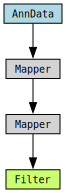

In [31]:
to_graph(fovs_ac_cd4t_large_cells)

And just like before, we can construct a DataLoader from this `IterDataPipe` and iterate over it efficiently on a FOV by FOV basis with the cell filtering applied.

In [37]:
fovs_ac_cd4t_large_cells_dl = DataLoader2(fovs_ac_cd4t_large_cells)

In [38]:
from squidpy import gr

In [40]:
for fov in fovs_ac_cd4t_large_cells_dl:
    gr.spatial_neighbors(adata=fov, radius=(50,300), spatial_key="spatial", coord_type="generic")

  (0, 1)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 10)	1.0
  (0, 14)	1.0
  (0, 15)	1.0
  (0, 18)	1.0
  (0, 19)	1.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 24)	1.0
  (0, 25)	1.0
  (0, 27)	1.0
  (0, 28)	1.0
  (0, 29)	1.0
  (0, 30)	1.0
  (0, 33)	1.0
  (0, 34)	1.0
  (0, 35)	1.0
  (0, 37)	1.0
  (0, 39)	1.0
  :	:
  (104, 77)	1.0
  (104, 78)	1.0
  (104, 79)	1.0
  (104, 80)	1.0
  (104, 81)	1.0
  (104, 82)	1.0
  (104, 83)	1.0
  (104, 84)	1.0
  (104, 85)	1.0
  (104, 86)	1.0
  (104, 87)	1.0
  (104, 88)	1.0
  (104, 89)	1.0
  (104, 90)	1.0
  (104, 91)	1.0
  (104, 92)	1.0
  (104, 93)	1.0
  (104, 94)	1.0
  (104, 95)	1.0
  (104, 97)	1.0
  (104, 98)	1.0
  (104, 99)	1.0
  (104, 100)	1.0
  (104, 102)	1.0
  (104, 103)	1.0
  (0, 1)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 1)	1.0
  (4, 2)	1.0
  (5, 3)	1.0
  (6, 7)	1.0
  (7, 6)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 15)	1.0
  (1, 2)	1.

/Users/srivarra/.pyenv/versions/3.11.5/envs/ark/lib/python3.11/site-packages/squidpy/gr/_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/Users/srivarra/.pyenv/versions/3.11.5/envs/ark/lib/python3.11/site-packages/squidpy/gr/_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/Users/srivarra/.pyenv/versions/3.11.5/envs/ark/lib/python3.11/site-packages/squidpy/gr/_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/Users/srivarra/.pyenv/versions/3.11.5/envs/ark/lib/python3.11/site-packages/squidpy/gr/_utils.py:198: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/Users/srivarra/.pyenv/versions/3.11.5/envs/ark/

In [36]:
fovs_ac

AnnCollection object with n_obs × n_vars = 15336 × 22
  constructed from 11 AnnData objects
    obs: 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif', 'num_concavities', 'fov', 'cell_meta_cluster'
    obsm: 'spatial'